In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title'].str.contains('Data Analyst', case=False, na=False)) & (df['job_country'] == 'United States')]

In [3]:
df_exploded = df_DA_US.explode('job_skills')

In [6]:
df_plot = df_exploded.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).head(10).reset_index()
df_plot

,job_skills,salary_year_avg
0,yarn,340000.0
1,dplyr,196250.0
2,bitbucket,189000.0
3,fastapi,185000.0
4,golang,161750.0
5,couchbase,160515.0
6,gitlab,158000.0
7,notion,150000.0
8,perl,150000.0
9,node,150000.0


In [34]:
df_plot2_index = df_exploded.groupby('job_skills')['salary_year_avg'].size().sort_values(ascending=False).head(10).index.tolist()
df_plot2 = df_exploded.groupby('job_skills')['salary_year_avg'].median().loc[df_plot2_index].reset_index()

C:\Users\eslam\AppData\Local\Temp\ipykernel_27476\1666734735.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\eslam\AppData\Local\Temp\ipykernel_27476\1666734735.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


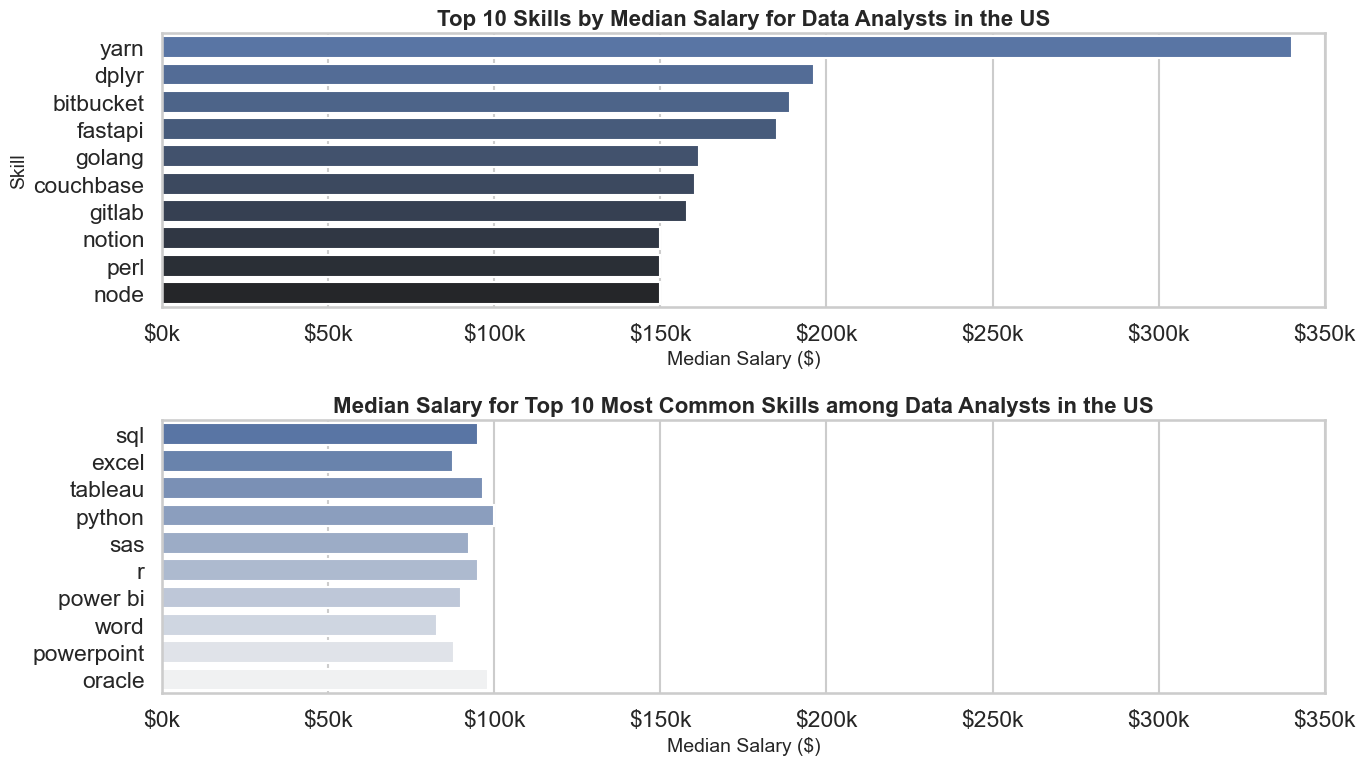

In [61]:
from matplotlib.ticker import FuncFormatter

def format_salary(x, pos):
    return f"${int(x/1000)}k"

sns.set_style("whitegrid")
sns.set_context("talk")

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

sns.barplot(
    data=df_plot,
    x='salary_year_avg',
    y='job_skills',
    palette='dark:b_r',
    ax=axes[0]
)
axes[0].set_xlim(0, 350000)
axes[0].set_title('Top 10 Skills by Median Salary for Data Analysts in the US', fontsize=16, weight='bold')
axes[0].set_xlabel('Median Salary ($)', fontsize=14)
axes[0].set_ylabel('Skill', fontsize=14)
axes[0].xaxis.set_major_formatter(FuncFormatter(format_salary))

sns.barplot(
    data=df_plot2,
    x='salary_year_avg',
    y='job_skills',
    palette='light:b_r',
    ax=axes[1]
)
axes[1].set_xlim(0, 350000)
axes[1].set_title('Median Salary for Top 10 Most Common Skills among Data Analysts in the US', fontsize=16, weight='bold')
axes[1].set_xlabel('Median Salary ($)', fontsize=14)
axes[1].set_ylabel('', fontsize=14)
axes[1].xaxis.set_major_formatter(FuncFormatter(format_salary))

plt.tight_layout()
sns.set_theme(style='ticks')
plt.show()